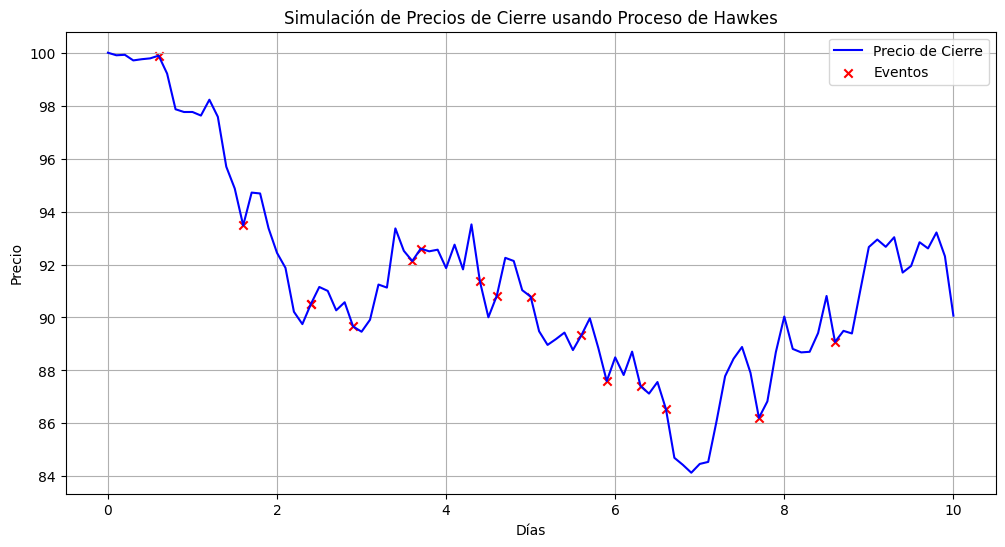

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes_prices(lambda_0, alpha, beta, T, initial_price=100, daily_volatility=1, num_days=100):
    """
    Simulate closing prices of a stock using a Hawkes process.

    :param lambda_0: Baseline intensity of the Hawkes process.
    :param alpha: Impact factor of each event on future intensity.
    :param beta: Decay rate of the impact.
    :param T: Total time to simulate.
    :param initial_price: Starting price of the stock.
    :param daily_volatility: Standard deviation of daily price changes.
    :param num_days: Number of days to simulate.
    :return: Time series of simulated closing prices.
    """
    dt = T / num_days  # Time step size
    times = np.linspace(0, T, num_days + 1)  # Discrete time steps
    prices = [initial_price]  # List to store closing prices
    
    # List to store event times for plotting
    event_times = []

    current_intensity = lambda_0  # Current intensity
    last_event_time = 0  # Last event time

    for i in range(1, num_days + 1):
        current_time = times[i]

        # Simulate the number of events in the current day
        num_events = np.random.poisson(current_intensity * dt)

        # Update intensity based on the number of events
        current_intensity = lambda_0 + alpha * np.sum(np.exp(-beta * (current_time - last_event_time)))

        # Calculate price change based on the number of events
        price_change = 0  # Initialize price change for the day
        for _ in range(num_events):
            event_times.append(current_time)
            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
            last_event_time = current_time

        # Add a random walk component even for days without events
        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    return times, prices, event_times

# Parámetros del modelo
lambda_0 = 0.5  # Intensidad base
alpha = 0.8     # Impacto de los eventos
beta = 1.5      # Tasa de decaimiento
T = 10     # Total de días a simular
initial_price = 100  # Precio inicial
daily_volatility = 1 # Volatilidad diaria
num_days = 100  # Número de días

# Simulación
times, prices, event_times = simulate_hawkes_prices(lambda_0, alpha, beta, T, initial_price, daily_volatility, num_days)

# Visualización de la serie temporal de precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(times, prices, label='Precio de Cierre', color='blue')

# Correct the indexing of event times to align with the time series
plt.scatter(event_times, [prices[int((t / T) * num_days)] for t in event_times], color='red', label='Eventos', marker='x')

plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Simulación de Precios de Cierre usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()
